In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gaurisp/affect-net-filtered")

print("Path to dataset files:", path)

100%|██████████| 2.85G/2.85G [00:36<00:00, 84.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gaurisp/affect-net-filtered/versions/1


In [11]:
import os

base_path = "/root/.cache/kagglehub/datasets/gaurisp/affect-net-filtered/versions/1/AffectNetFiltered"

train_dir = os.path.join(base_path, "AffectNet_filtered_TRAIN")
test_dir = os.path.join(base_path, "AffectNet_filtered_TEST")

# Ver clases en train
print("Clases en train:", os.listdir(train_dir))
print("Clases en test:", os.listdir(test_dir))

# Mapeo
mapeo = ['','','','','surprise','']

Clases en train: ['6', '7', '5', '4', '2', '0', '3', '1']
Clases en validation: ['6', '7', '5', '4', '2', '0', '3', '1']


In [19]:
#Numero de datos
train_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}
validation_counts = {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in os.listdir(test_dir)}

print("Cantidad de imágenes en train:")
for cls, count in train_counts.items():
    print(f"{cls}: {count}")

print("\nCantidad de imágenes en test:")
for cls, count in validation_counts.items():
    print(f"{cls}: {count}")

total_train = sum(train_counts.values())
total_test = sum(validation_counts.values())

print(f"\nTotal de imágenes en TRAIN: {total_train}")
print(f"Total de imágenes en TEST: {total_test}")
print(f"Total de imágenes en TOTAL: {total_train + total_test}")

Cantidad de imágenes en train:
6: 4649
7: 3582
5: 4580
4: 4494
2: 4437
0: 4491
3: 4749
1: 3556

Cantidad de imágenes en test:
6: 371
7: 376
5: 370
4: 367
2: 364
0: 363
3: 380
1: 373

Total de imágenes en TRAIN: 34538
Total de imágenes en TEST: 2964
Total de imágenes en TOTAL: 37502


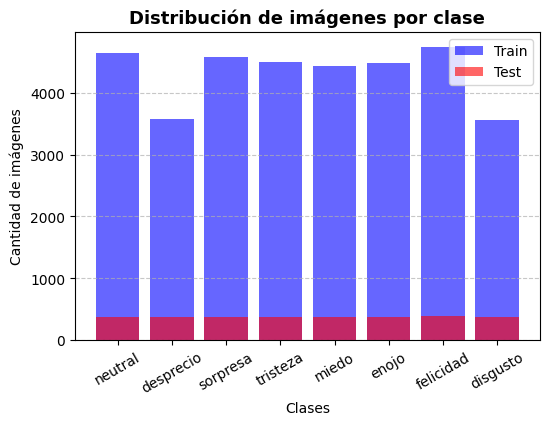

In [45]:
# Histograma
import matplotlib.pyplot as plt
import numpy as np

label_map = {
    "0": "enojo",
    "1": "disgusto",
    "2": "miedo",
    "3": "felicidad",
    "4": "tristeza",
    "5": "sorpresa",
    "6": "neutral",
    "7": "desprecio"
}

# Convertir claves a etiquetas
train_labels = [label_map.get(cls, cls) for cls in train_counts.keys()]
validation_labels = [label_map.get(cls, cls) for cls in validation_counts.keys()]

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
#plt.bar(test_counts.keys(), test_counts.values(), alpha=1, label="Test",color = 'm')
#plt.bar(test_labels, test_counts.values(), alpha=1, label="Test", color='purple', edgecolor='black', linewidth=1)
plt.bar(train_labels, train_counts.values(), alpha=0.6, label="Train", color='blue', linewidth=1)
plt.bar(validation_labels, validation_counts.values(), alpha=0.6, label="Test", color='red', linewidth=1)



# Etiquetas y título
plt.xlabel("Clases")
plt.ylabel("Cantidad de imágenes")
plt.title("Distribución de imágenes por clase", fontsize=13, fontweight='semibold')
plt.xticks(rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
pdf_path = "DistribucionClases_AffectNet.pdf"
plt.savefig(pdf_path, format="pdf", bbox_inches="tight")
# Mostrar gráfico
plt.show()

# guardar imagen en pdf

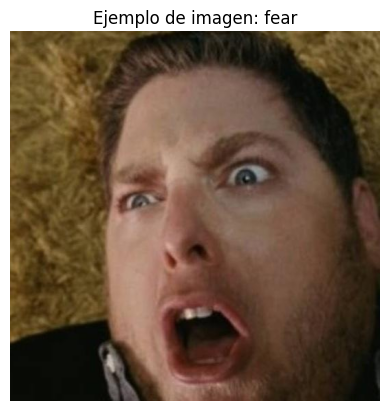

In [29]:
import cv2
import matplotlib.pyplot as plt
import random

# Seleccionar una imagen aleatoria de la clase 'angry'
angry_path = os.path.join(train_dir, "2")
angry_images = os.listdir(angry_path)

if angry_images:  # Verifica que haya imágenes en la carpeta
    sample_image = random.choice(angry_images)  # Selecciona una imagen aleatoria
    image_path = os.path.join(angry_path, sample_image)

    # Cargar y convertir a RGB
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Mostrar imagen
    plt.imshow(image)
    plt.axis("off")
    plt.title("Ejemplo de imagen: fear")
    plt.show()


In [30]:
import cv2
import numpy as np

image_sizes = []

for cls in os.listdir(train_dir):
    class_path = os.path.join(train_dir, cls)
    sample_images = os.listdir(class_path)[:10]  # Analizar solo 10 imágenes por clase
    for img_name in sample_images:
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            image_sizes.append(img.shape[:2])  # (Alto, Ancho)

# Convertir a array de NumPy
image_sizes = np.array(image_sizes)

# Mostrar estadísticas
print(f"Dimensión mínima: {image_sizes.min(axis=0)}")
print(f"Dimensión máxima: {image_sizes.max(axis=0)}")
print(f"Dimensión promedio: {image_sizes.mean(axis=0)}")

Dimensión mínima: [152 152]
Dimensión máxima: [3067 3067]
Dimensión promedio: [520.025 520.025]


  Clase  Train  Validation    % Train  % Validation
0     6   4649         371  13.460536     12.516869
1     7   3582         376  10.371185     12.685560
2     5   4580         370  13.260756     12.483131
3     4   4494         367  13.011755     12.381916
4     2   4437         364  12.846720     12.280702
5     0   4491         363  13.003069     12.246964
6     3   4749         380  13.750072     12.820513
7     1   3556         373  10.295906     12.584345


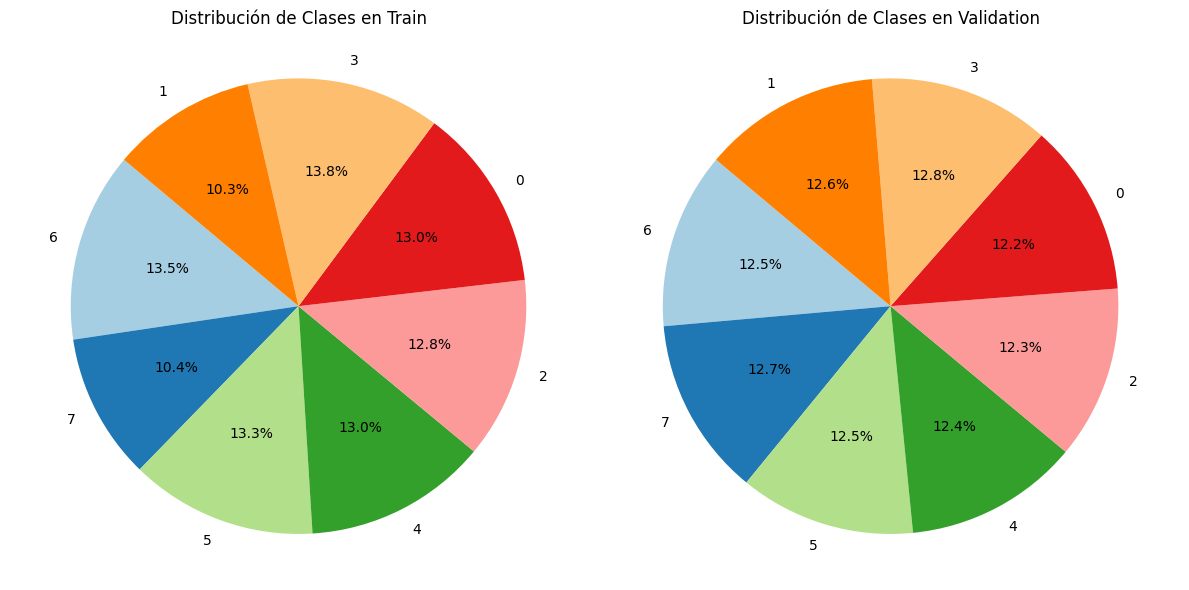

In [31]:
import pandas as pd

# Convertir los conteos en DataFrame
df_counts = pd.DataFrame({"Clase": list(train_counts.keys()),
                          "Train": list(train_counts.values()),
                          "Validation": list(validation_counts.values())})

# Calcular porcentaje
df_counts["% Train"] = (df_counts["Train"] / df_counts["Train"].sum()) * 100
df_counts["% Validation"] = (df_counts["Validation"] / df_counts["Validation"].sum()) * 100

print(df_counts)

# GRAFICO DE TORTA CON BALANCE
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Gráfico de Train
axes[0].pie(df_counts["% Train"], labels=df_counts["Clase"], autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title("Distribución de Clases en Train")
axes[0].axis("equal")  # Para que el círculo no se deforme

# Gráfico de Validation
axes[1].pie(df_counts["% Validation"], labels=df_counts["Clase"], autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title("Distribución de Clases en Validation")
axes[1].axis("equal")  # Para que el círculo no se deforme

plt.tight_layout()
plt.savefig('BalanceClases_dataset1.pdf', format="pdf", bbox_inches="tight") # guardar
# Mostrar gráficos
plt.show()

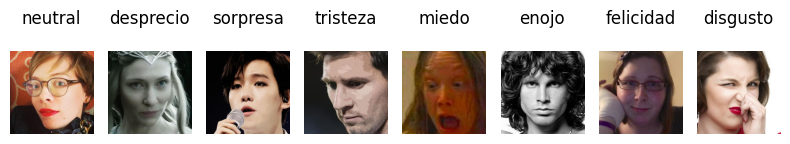

In [44]:
# COLLAGE PRUEBA
# Obtener las clases
classes = os.listdir(train_dir)
num_classes = len(classes)

# Crear figura para el collage
fig, axes = plt.subplots(1, num_classes, figsize=(8, 4))  # Ajusta el tamaño según necesites

for i, cls in enumerate(classes):
    class_path = os.path.join(train_dir, cls)
    img_name = random.choice(os.listdir(class_path))  # Selecciona imagen aleatoria
    img_path = os.path.join(class_path, img_name)

    # Cargar imagen
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Mostrar en la figura
    axes[i].imshow(img)
    axes[i].set_title(label_map.get(cls, cls),pad=20)
    axes[i].axis("off")  # Quitar ejes

# Ajustar el diseño
plt.tight_layout()
plt.savefig('CollageClases_AffectNet.pdf', format="pdf", bbox_inches="tight") # guardar
# Mostrar collage
plt.show()